In [1]:
from astroML import stats as astroMLstats

def bins_num (X) :

    sigmaG2 = astroMLstats.sigmaG(X) # quantile al 75 - quantile al 25
    binsize = 2.7 * sigmaG2 / (len(X)**(1/3)) #formula di Freedman-Diaconis
    N = (max(X) - min(X))/binsize

    return int(N+2)

Istogramma dei dati 

/tmp/ipykernel_17076/49065073.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(N+2)


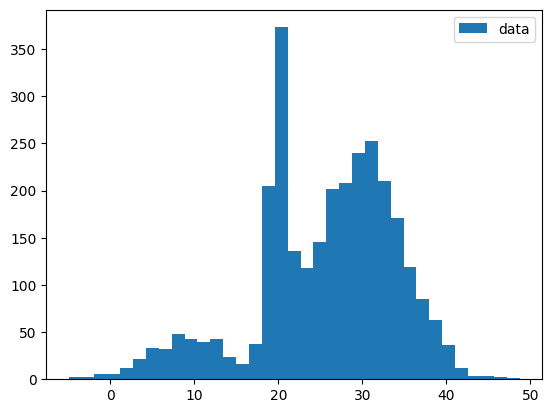

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

data = np.load("formationchannels.npy")

bins = bins_num(data)

plt.hist(data, bins, label = "data")
plt.legend()
plt.show()

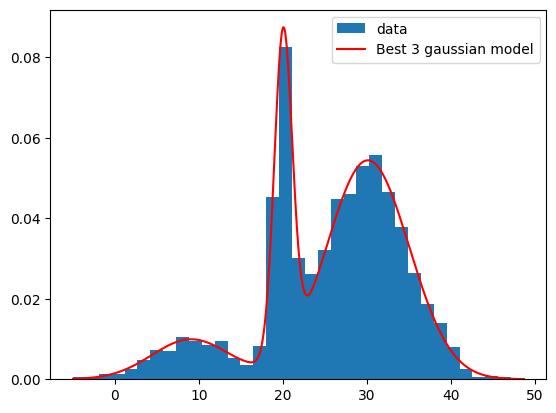

In [3]:
gm = sklearn.mixture.GaussianMixture(n_components=3, random_state=42) #definiamo un modello a 3 gaussiane
gm.fit(data)    #trova il miglior modello a 3 gaussiane che fitta i dati

x = np.linspace(data.min(), data.max(), 1000).reshape(-1,1) #reshape serve a mettere in "verticale" l'array
pdf = np.exp(gm.score_samples(x)) 
#score_sample restituisce la log likelihood per ogni punto, potevamo usare score per ottenere quello dell'intero modello e non del singolo punto

plt.hist(data, bins, density=True, label ="data") #normalizzato, perchè tale è il modello
plt.plot(x,pdf, color = "red", label = "Best 3 gaussian model")
plt.legend()
plt.show()

AIC (Akaike Information Criterion) e BIC (Bayesian Information Criterion) sono due criteri utilizzati per confrontare modelli statistici e scegliere quello migliore. Sono particolarmente utili nel contesto dei Gaussian Mixture Models (GMM) per determinare il numero ottimale di componenti (Gaussiane).

 - AIC bilancia la qualità dell’adattamento del modello (likelihood) e la sua complessità. Modelli con più parametri possono adattarsi meglio ai dati, ma rischiano di overfittare.

 - BIC è simile all'AIC ma penalizza di più la complessità. BIC ha un termine che cresce con i dati, quindi tende a preferire modelli più semplici rispetto all'AIC, specialmente se i dati sono numerosi

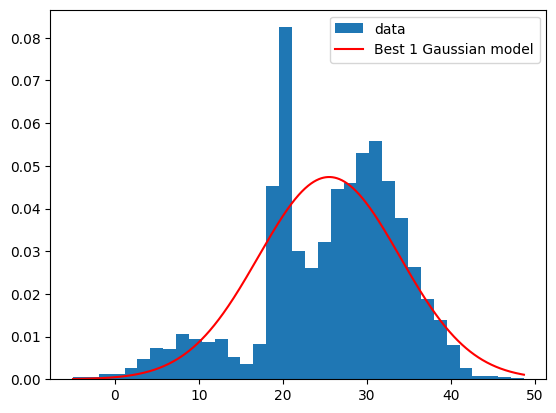

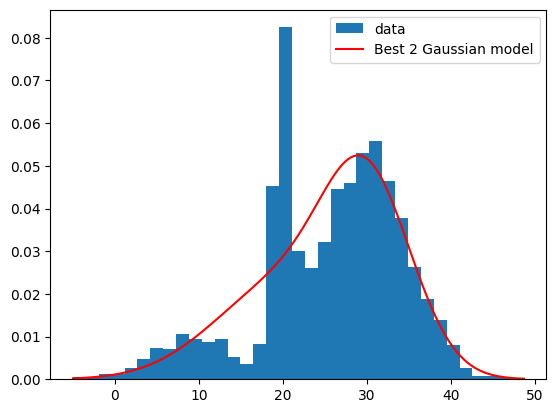

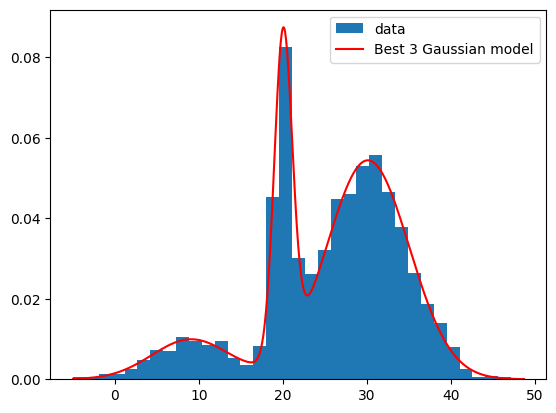

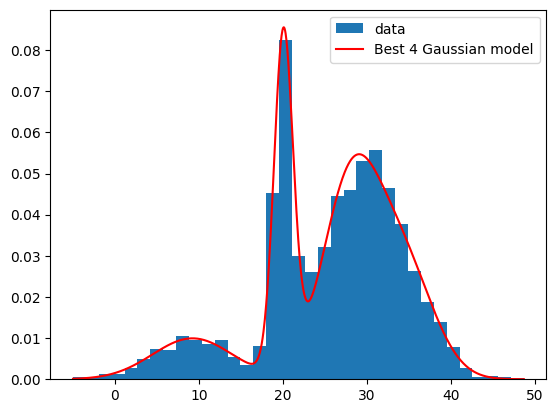

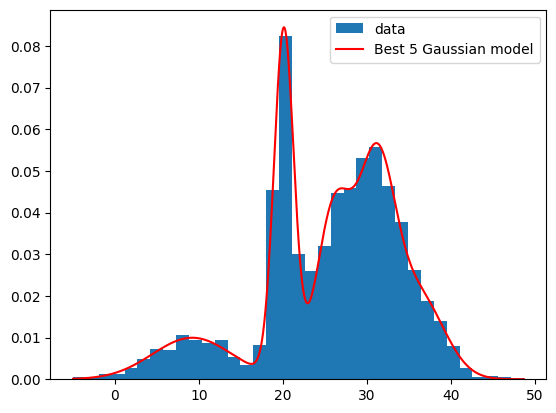

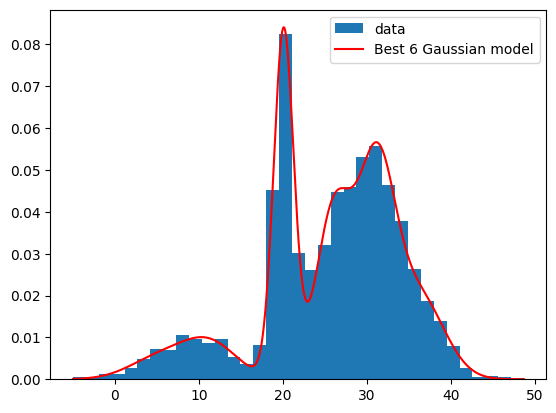

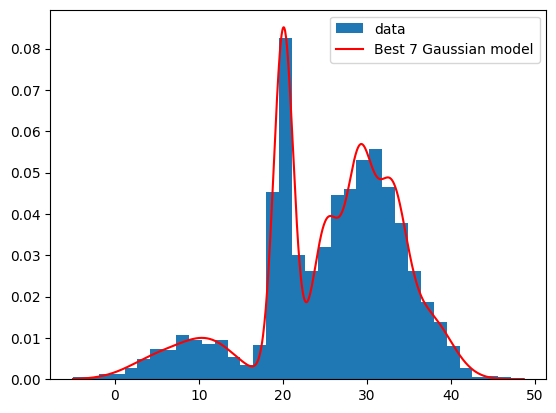

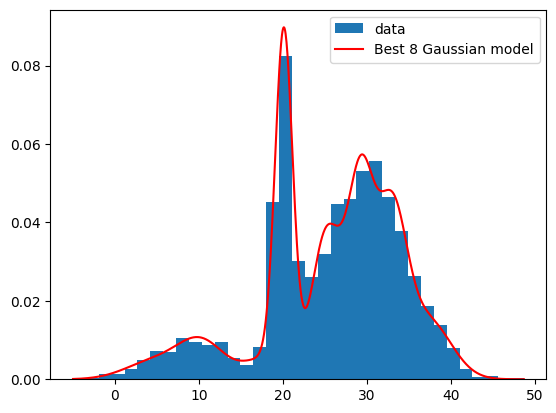

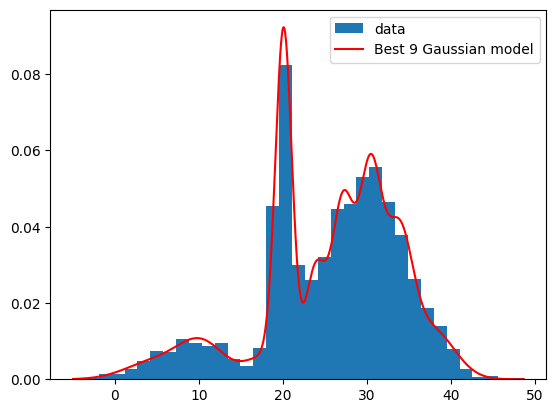

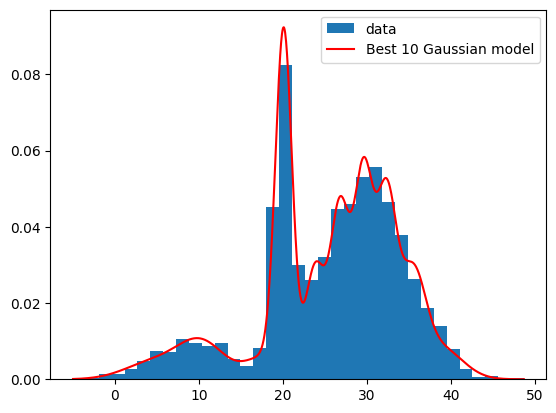

In [4]:
AIC = []
BIC = []

for i in range(10): #rifacciamo come prima ma definendo un modello con i+1 gaussiane ad ogni ciclo
    gm = sklearn.mixture.GaussianMixture(n_components=i+1, random_state=42)

    gm.fit(data)

    x = np.linspace(data.min(), data.max(), 1000).reshape(-1,1)
    pdf = np.exp(gm.score_samples(x)) 
    #score restituisce la log likelihood per ogni punto, potevamo usare score per ottenere quello dell'intero modello e non del singolo punto

    plt.hist(data, bins, density=True, label = "data")
    plt.plot(x, pdf, color="red", label="Best " + str(i+1) + " Gaussian model")

    AIC.append(gm.aic(data)) #salviamo dai fit AIC e BIC
    BIC.append(gm.bic(data))

    plt.legend()

    plt.show()
    plt.close()

Plot di AIC e BIC al variare del numero di gaussiane usate nel modello

Numero ottimale di Gaussiane da AIC: 3
Numero ottimale di Gaussiane da BIC: 3


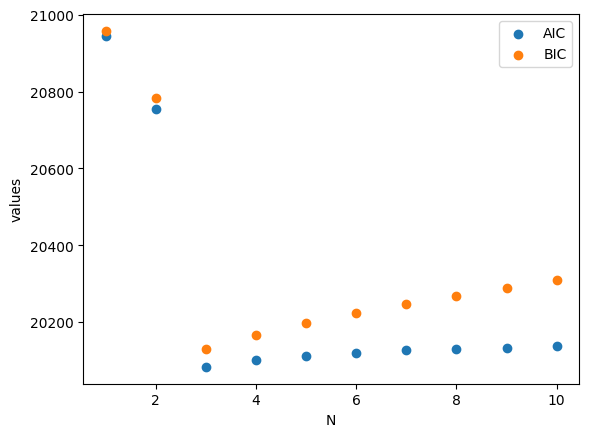

In [5]:
plt.scatter(range(1,11), AIC, label ="AIC")
plt.scatter(range(1,11), BIC , label ="BIC")
plt.xlabel("N")
plt.ylabel("values")
plt.legend()

# miglior numero di Gaussiane scelto in base ad AIC/BIC
best_n_AIC = np.argmin(AIC) + 1  # +1 perché gli indici partono da 0
print(f"Numero ottimale di Gaussiane da AIC: {best_n_AIC}")
best_n_BIC = np.argmin(BIC) + 1
print(f"Numero ottimale di Gaussiane da BIC: {best_n_BIC}")

plt.show()

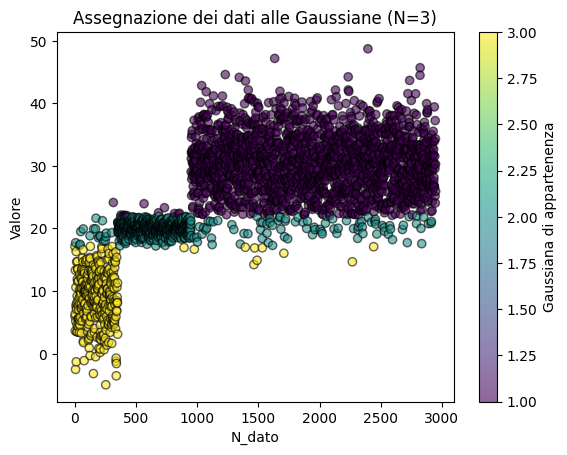

In [6]:
Number_gauss = 3 #numero di gaussiane per il mixture

gm = sklearn.mixture.GaussianMixture(n_components=Number_gauss, random_state=42)
gm.fit(data)

# Prediciamo l'assegnazione ai cluster
labels = gm.predict(data)

# Plottiamo i dati colorati in base alla Gaussiana
plt.scatter(range(len(data)), data, c=labels + 1, cmap="viridis", alpha=0.6, edgecolor="k")

plt.xlabel("N_dato")
plt.ylabel("Valore")
plt.title(f"Assegnazione dei dati alle Gaussiane (N={Number_gauss})")
plt.colorbar(label="Gaussiana di appartenenza")
plt.show()